# **Create a neural network from scratch using Python and NumPy to classify handwritten digits from the MNIST dataset.**

Loading MNIST dataset...


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Training the neural network...
Iteration 0, Loss: 2.3045432425057437
Iteration 100, Loss: 2.264813499116218
Iteration 200, Loss: 2.007459891144939
Iteration 300, Loss: 1.4344191216347904
Iteration 400, Loss: 1.0480086258971644
Iteration 500, Loss: 0.8312265814786787
Iteration 600, Loss: 0.6968149661158455
Iteration 700, Loss: 0.6093223878568308
Iteration 800, Loss: 0.5491405366605735
Iteration 900, Loss: 0.5052855812209828
Evaluating the model...
Test Accuracy: 87.59%


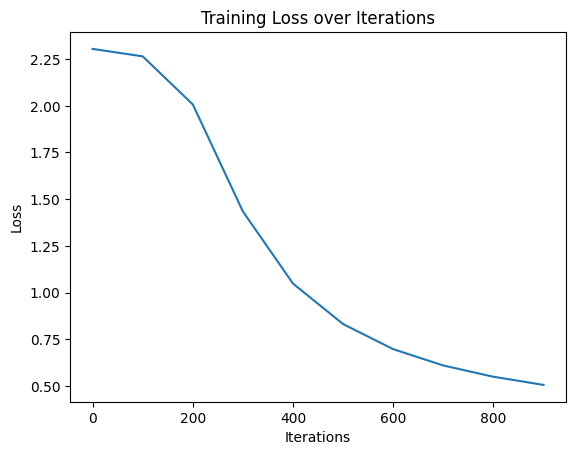

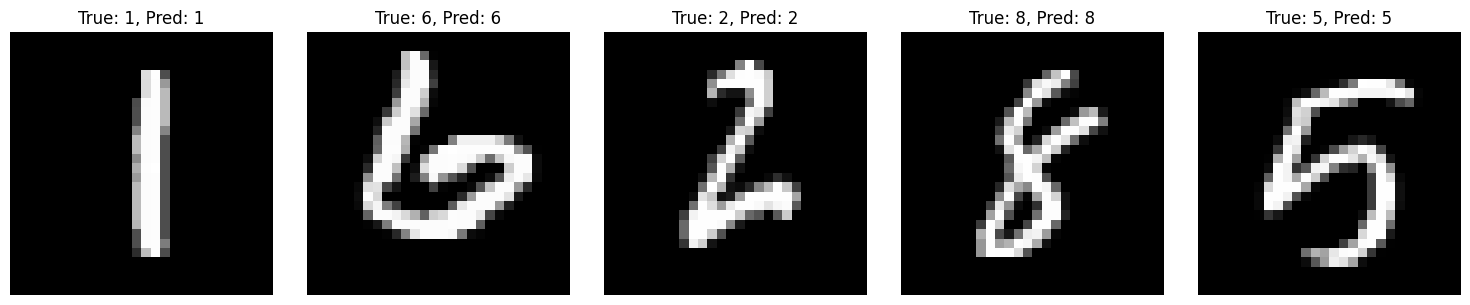

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# 1. Load and preprocess the MNIST dataset
print("Loading MNIST dataset...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0  # Normalize pixel values to [0, 1]
y = y.astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define the neural network architecture
input_size = 784  # 28x28 pixels
hidden_size = 128
output_size = 10  # 10 digits (0-9)

# 3. Initialize weights and biases
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))
    return W1, b1, W2, b2

# 4. Activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

# 5. Forward propagation
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X.T) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# 6. Compute loss
def compute_loss(A2, Y):
    m = Y.shape[0]
    log_probs = -np.log(A2[Y, range(m)])
    loss = np.sum(log_probs) / m
    return loss

# 7. Backpropagation
def backward_propagation(X, Y, Z1, A1, Z2, A2, W1, W2):
    m = X.shape[0]
    one_hot_Y = np.eye(10)[Y]

    dZ2 = A2.T - one_hot_Y
    dW2 = np.dot(dZ2.T, A1.T) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True).T / m

    dA1 = np.dot(W2.T, dZ2.T)
    dZ1 = dA1 * A1 * (1 - A1)
    dW1 = np.dot(dZ1, X) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    return dW1, db1, dW2, db2

# 8. Update parameters
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    return W1, b1, W2, b2

# 9. Train the neural network
def train_neural_network(X, Y, hidden_size, num_iterations, learning_rate):
    input_size = X.shape[1]
    output_size = 10

    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)

    losses = []

    for i in range(num_iterations):
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
        loss = compute_loss(A2, Y)
        dW1, db1, dW2, db2 = backward_propagation(X, Y, Z1, A1, Z2, A2, W1, W2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        if i % 100 == 0:
            print(f"Iteration {i}, Loss: {loss}")
            losses.append(loss)

    return W1, b1, W2, b2, losses

# 10. Predict function
def predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)
    return np.argmax(A2, axis=0)

# 11. Train the model
print("Training the neural network...")
num_iterations = 1000
learning_rate = 0.1
W1, b1, W2, b2, losses = train_neural_network(X_train, y_train, hidden_size, num_iterations, learning_rate)

# 12. Evaluate the model
print("Evaluating the model...")
y_pred = predict(X_test, W1, b1, W2, b2)
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# 13. Plot the loss curve
plt.plot(range(0, num_iterations, 100), losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations')
plt.show()

# 14. Visualize some predictions
def plot_images_and_predictions(X, y_true, y_pred, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        idx = np.random.randint(0, len(X))
        axes[i].imshow(X[idx].reshape(28, 28), cmap='gray')
        axes[i].set_title(f"True: {y_true[idx]}, Pred: {y_pred[idx]}")
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

plot_images_and_predictions(X_test, y_test, y_pred)